<a href="https://colab.research.google.com/github/uziblum/GitHub-Markdown-Font-Settings.tmbundle/blob/master/Linear_Regression_20191209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

In [0]:
# Example reference: https://medium.com/analytics-vidhya/linear-regression-using-python-ce21aa90ade6

In [0]:
USAhousing = pd.read_csv('housing_train.csv')

In [0]:
USAhousing.head()
USAhousing.info()
USAhousing.describe()
USAhousing.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
USAhousing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
mini = USAhousing[['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 'FullBath','SalePrice']]

In [0]:
mini.head()


,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,1stFlrSF,FullBath,SalePrice
0,8450,2003,706,150,856,2,208500
1,9600,1976,978,284,1262,2,181500
2,11250,2001,486,434,920,2,223500
3,9550,1915,216,540,961,1,140000
4,14260,2000,655,490,1145,2,250000


In [0]:
mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
LotArea       1460 non-null int64
YearBuilt     1460 non-null int64
BsmtFinSF1    1460 non-null int64
BsmtUnfSF     1460 non-null int64
1stFlrSF      1460 non-null int64
FullBath      1460 non-null int64
SalePrice     1460 non-null int64
dtypes: int64(7)
memory usage: 79.9 KB


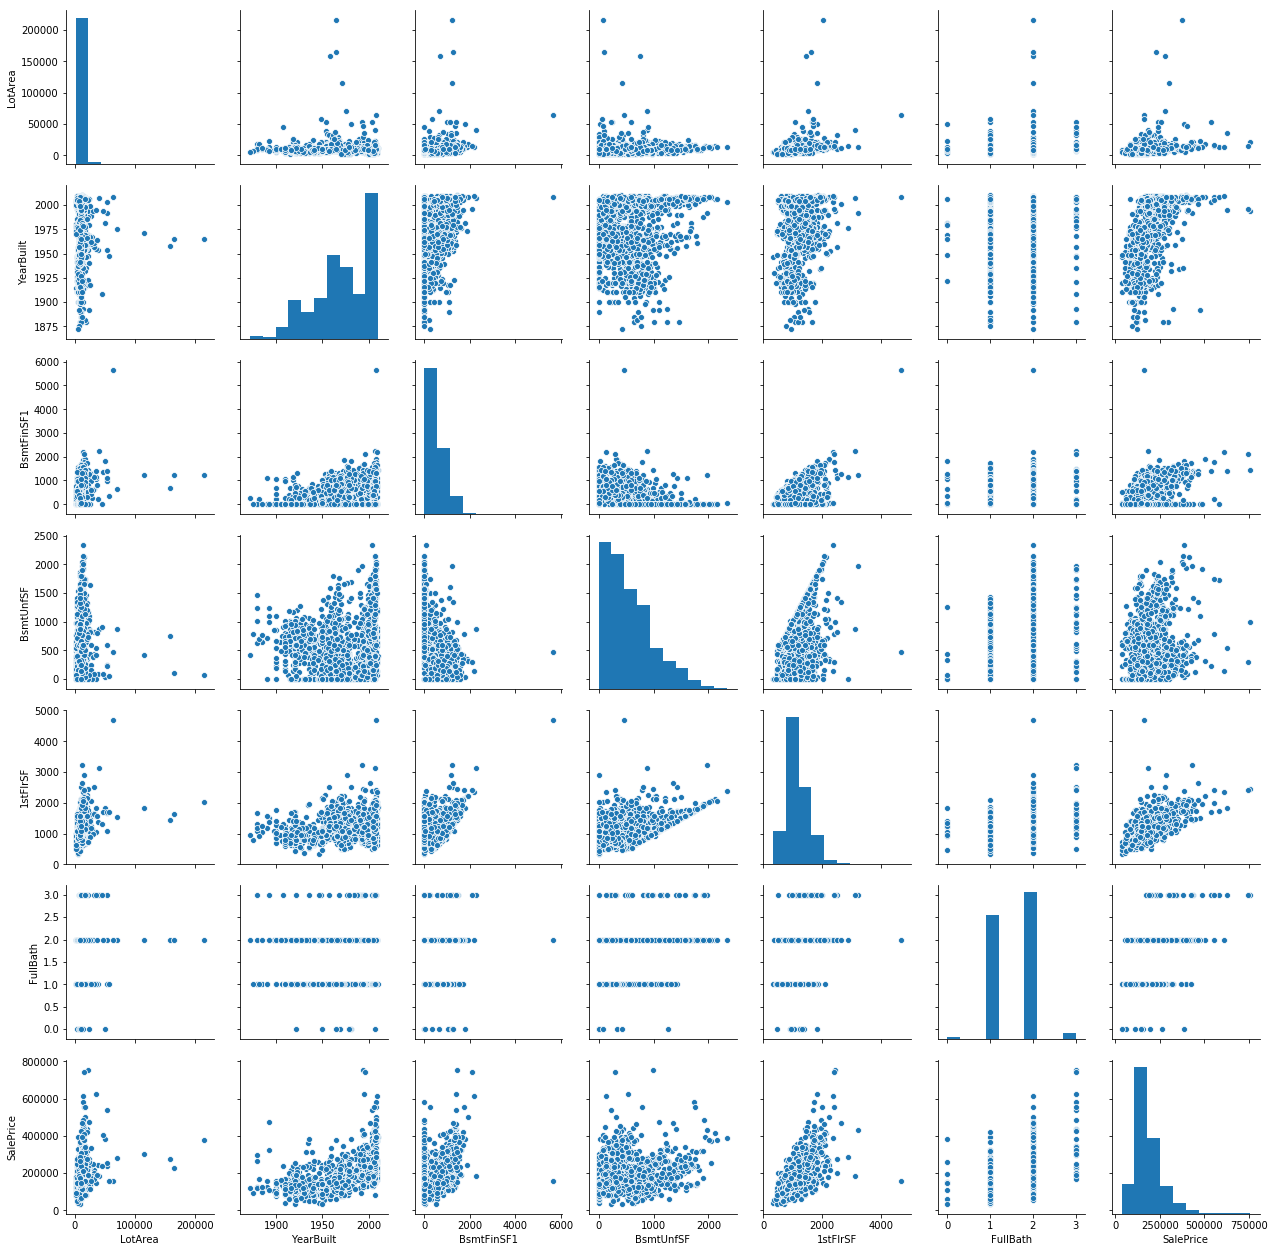

In [0]:
sns.pairplot(mini)

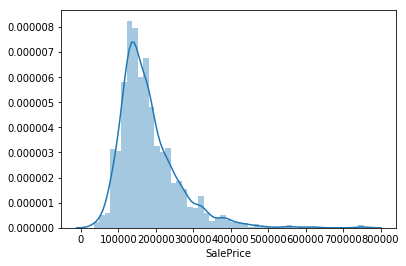

In [0]:
sns.distplot(mini['SalePrice'])

In [0]:
mini.corr()

,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,1stFlrSF,FullBath,SalePrice
LotArea,1.000000,0.014228,0.214103,-0.002618,0.299475,0.126031,0.263843
YearBuilt,0.014228,1.000000,0.249503,0.149040,0.281986,0.468271,0.522897
BsmtFinSF1,0.214103,0.249503,1.000000,-0.495251,0.445863,0.058543,0.386420
BsmtUnfSF,-0.002618,0.149040,-0.495251,1.000000,0.317987,0.288886,0.214479
1stFlrSF,0.299475,0.281986,0.445863,0.317987,1.000000,0.380637,0.605852
FullBath,0.126031,0.468271,0.058543,0.288886,0.380637,1.000000,0.560664
SalePrice,0.263843,0.522897,0.386420,0.214479,0.605852,0.560664,1.000000


In [0]:
X = mini[['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 'FullBath']]
y = mini['SalePrice']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
#lm = LinearRegression()
model = LinearRegression()

In [0]:
#lm.fit(X_train,y_train)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
#predictions = lm.predict(X_test)
predictions = model.predict(X_test)

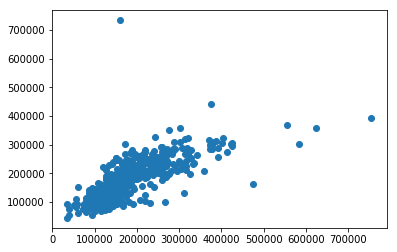

In [0]:
plt.scatter(y_test,predictions)

In [0]:
from sklearn.externals import joblib

In [0]:
filename = 'linear_model'
joblib.dump(model, filename)

['linear_model']

In [0]:
#8450,2003,706,150,856,2,208500
input_values = [8450,2003,706,150,856,2]

prediction = model.predict([input_values])
prediction = round(prediction[0], 2)
print(prediction)

204998.23


In [0]:
import pickle

In [0]:
pickle.dump(model, open('model.pkl','wb'))

In [0]:
from sklearn.metrics import r2_score

In [0]:
score = r2_score(y_test,predictions)

In [0]:
print(score)

0.5103049505585786


In [0]:
#"if the R2 of a model is 0.50, 
#then approximately half of the observed variation can be explained by the model's inputs"

In [0]:
#Apply One hot encoder for categorial features

In [0]:
medium = USAhousing[['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 'FullBath','KitchenQual', 'SalePrice']]

In [0]:
import category_encoders as ce

In [0]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)

In [0]:
medium_ohe = ohe.fit_transform(medium)

In [0]:
medium_ohe.head()

,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,1stFlrSF,FullBath,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa,SalePrice
0,8450,2003,706,150,856,2,1,0,0,0,208500
1,9600,1976,978,284,1262,2,0,1,0,0,181500
2,11250,2001,486,434,920,2,1,0,0,0,223500
3,9550,1915,216,540,961,1,1,0,0,0,140000
4,14260,2000,655,490,1145,2,1,0,0,0,250000
